---
# Feature Engineering Techniques
---

### Normalization

Normalization is a data preparation and feature scaling technique to rescale numerical data into a specific range (usually [0,1] or [-1,1]) before passing the data to some of the ML algorithms. The goal is to ensure that all features contribute equally to the model by bringing them to a comparable scale.

Following are some of the Normalization Techniques:

   
1. #### Min-Max Scaling
   ---
   
   It scales values between 0 and 1 (or any custom range). It preserves the shape of the distribution and it is sensitive to outliers. This is best when data is not normally distributed.

   #### Formula: $X' = \frac{X - X_{min}}{X_{max} - X_{min}}$

   ---
2. #### Mean Scaling
   ---
   
   It scales values between -1 to 1. In this scaling we bring the mean to zero.

   #### Formula: $X' = \frac{X_i - \bar{x}}{X_{max} - X_{min}}$

   ---
2. #### Standardization (Z-Score Normalization)
   ---

   Also known as Standardization, this technique transforms data into a distribution with mean = 0 and standard deviation = 1. This is best for normally distributed data.

   #### Formula: $X' = \frac{X - \bar{X}}{\sigma}$

   ---
3. #### Decimal Scaling
   ---

   It works by moving the decimal point to bring values into a smaller range. It is a less commonly used technique. It is useful when the range is unknown.
   
   #### Formula: $X' = \frac{X}{10^j}$

   ---
4. #### Log Scaling: 
   ---
      
   Applies a logarithmic transformation to compress large values: 
   
   #### Formula:  $X' = log(X + 1)$

   ---
5. #### Robust Scaling:
   --- 
   
   Uses the median and interquartile range (IQR) instead of mean & std. It works well with outliers:  
   
   #### Formula: $X' = \frac{X - median}{IQR}$
   
   ---
6. #### Unit Vector Scaling:
   ---
   
   Converts data into unit vectors with magnitude = 1:  
   
   #### Formula: $X' = \frac{X_{vec}}{||X_{\max}||}$

   ---
7. #### Max Absolute Scaling: 
   ---
   
   Scales values by dividing by the maximum absolute value. 
   
   #### Formula: $X' = \frac{X}{|X_{\max}|}$

X = Original Value  
$X'$ = Normalized value  
$X_{vec}$ = Vector X  
$\bar{x}$ = Mean  
$X_{min}$ = Min value of X in Sample Space  
$X_{max}$ = Max value of X in Sample Space  
$\sigma$ = Standard Deviation  
j = is the smallest integer that values fall within [-1, 1]  
IQR = Inter Quartile Range  {75th Percentile - 25th Percentile}  
|...| = Absolute value  
$\|X\| = \sqrt{\sum_{i=1}^{n} x_i^2}$  
  

# Min-Max Scaling

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("./data/wine_data.csv")
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [39]:
df = df.iloc[:, [0, 1, 2]]
df.columns = ['Class', 'Alcohol', 'Malic_Acid']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
Alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
Malic_Acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80


<Axes: ylabel='Density'>

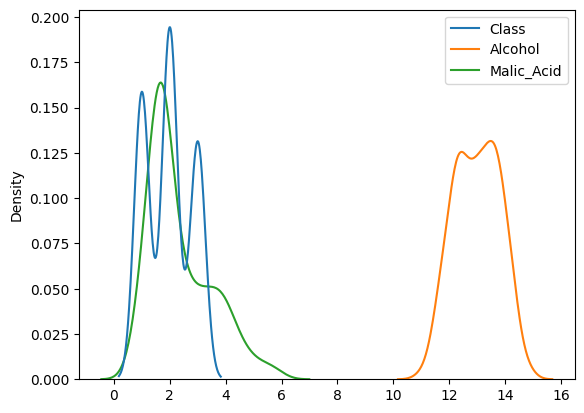

In [40]:

sns.kdeplot(df)

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

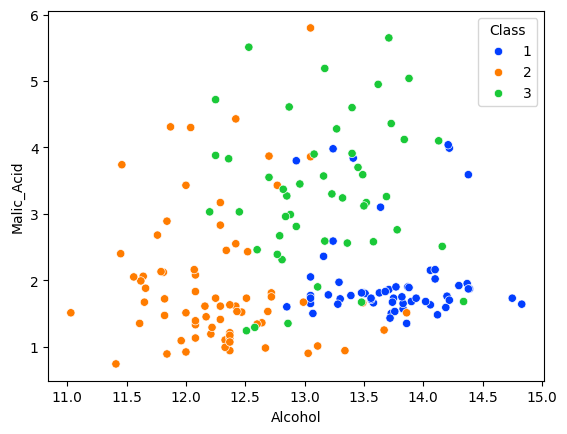

In [41]:
sns.scatterplot(data=df, x='Alcohol', y='Malic_Acid', hue='Class', palette='bright')

In [42]:
# import train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis = 1), df['Class'], test_size=0.2, random_state=10
)

X_train.shape, X_test.shape

((141, 2), (36, 2))

In [43]:
# import minmax scaller
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head(), X_test_scaled.head()

(    Alcohol  Malic_Acid
 0  0.205263    0.272727
 1  0.436842    0.156126
 2  0.531579    0.258893
 3  0.113158    0.592885
 4  0.365789    0.729249,
     Alcohol  Malic_Acid
 0  0.331579    0.171937
 1  0.389474    0.195652
 2  0.500000    0.604743
 3  0.365789    0.171937
 4  0.594737    0.243083)

In [44]:
np.round(X_train_scaled.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Alcohol,141.0,0.52,0.22,0.0,0.34,0.53,0.70,1.0
Malic_Acid,141.0,0.33,0.23,0.0,0.18,0.23,0.49,1.0


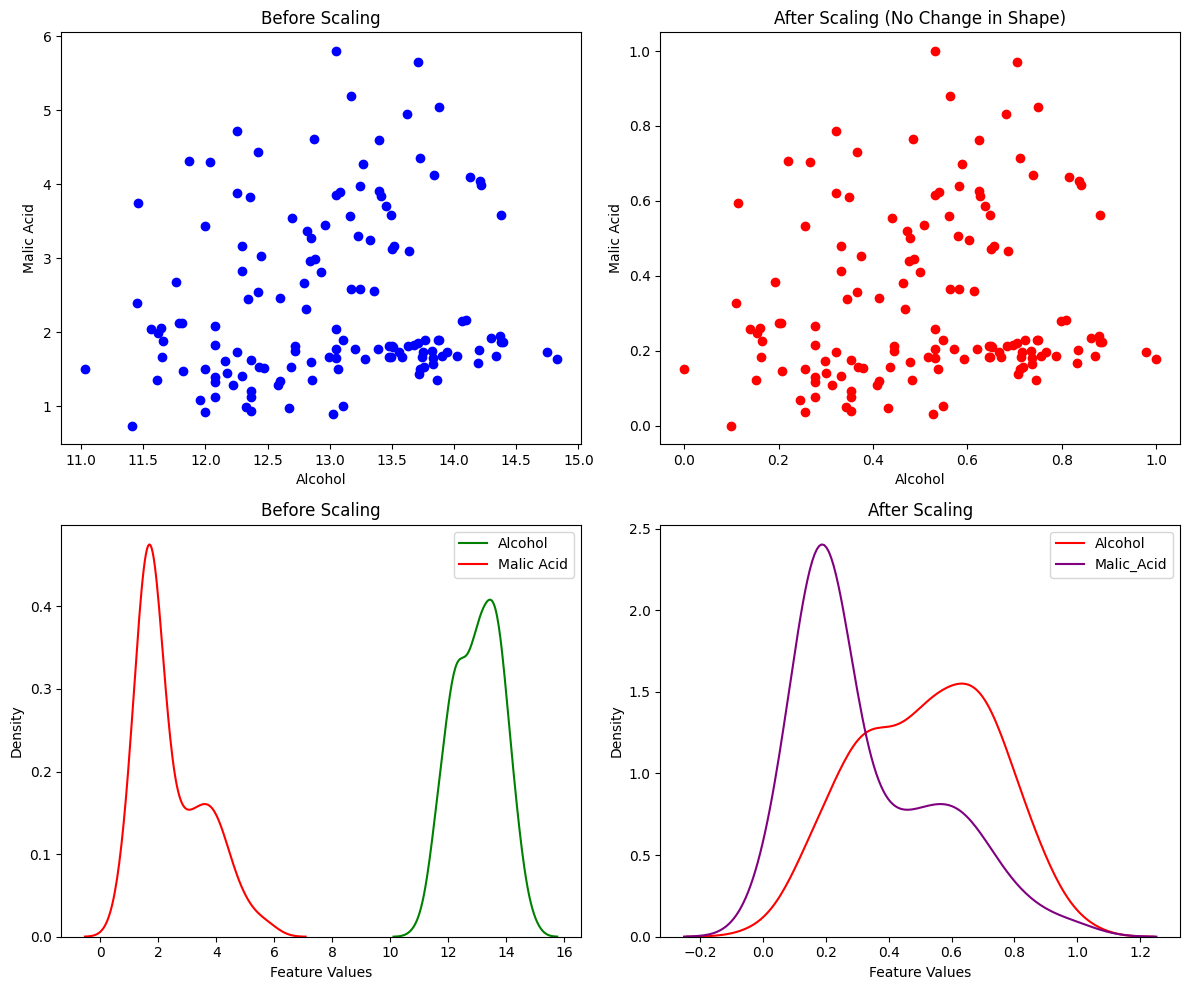

In [45]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.scatter(x = X_train['Alcohol'], y = X_train['Malic_Acid'], color='blue')
ax1.set_title('Before Scaling')
# Set x and y axis label
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')

ax2.scatter(x = X_train_scaled['Alcohol'], y = X_train_scaled['Malic_Acid'], color='red')
ax2.set_title('After Scaling (No Change in Shape)')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic Acid')

sns.kdeplot(X_train['Alcohol'], ax = ax3, label="Alcohol", color="green")
sns.kdeplot(X_train['Malic_Acid'], label="Malic Acid", ax = ax3, color="red")
# Set x and y axis label
ax3.set_title('Before Scaling')
ax3.set_xlabel('Feature Values')
ax3.set_ylabel('Density')
ax3.legend()

sns.kdeplot(X_train_scaled['Alcohol'], ax = ax4, color="red", label="Alcohol")
sns.kdeplot(X_train_scaled['Malic_Acid'], ax = ax4, color="purple", label="Malic_Acid")
# Set x and y axis label
ax4.set_title('After Scaling')
ax4.set_xlabel('Feature Values')
ax4.set_ylabel('Density')
ax4.legend()
# Display legend for ax4

plt.tight_layout()
plt.show()

You can observe that there is no change in the shape and distribution of the data but in the lower-right graph the data is now scalled between 0 and 1 aprox.